Coderscave

Task:Email Spam Detection using Python

Name: Kavya Rao

In [1]:
#importing necessary libraries 
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing Data
data_frame = pd.read_csv('spam_ham_dataset.csv')

####  Performing descriptive analysis. Understand the variables and their corresponding values. 

In [3]:
# Understanding the dimensions of data
data_frame.shape

(5171, 4)

In [4]:
# Understanding the Data Variables
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [5]:
data_frame.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [6]:
# Show the top 10 Rows of data
data_frame.head(10)

Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   
5        2949   ham  Subject: ehronline web address change\r\nthis ...   
6        2793   ham  Subject: spring savings certificate - take 30 ...   
7        4185  spam  Subject: looking for medication ? we ` re the ...   
8        2641   ham  Subject: noms / actual flow for 2 / 26\r\nwe a...   
9        1870   ham  Subject: nominations for oct . 21 - 23 , 2000\...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0  
5          0  
6          0  
7          1  
8          0  
9          0

In [7]:
# Checking for any Duplicated Entries
data_frame.duplicated().sum()

0

In [8]:
data_frame.drop_duplicates(keep = 'first', inplace = True)
data_frame.shape

(5171, 4)

In [9]:
#Detecting missing values
data_frame.isna().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [10]:
#Dropping unwanted Columns from data
data_frame.drop(columns=['Unnamed: 0'], inplace=True )
data_frame.head()

label                                               text  label_num
0   ham  Subject: enron methanol ; meter # : 988291\r\n...          0
1   ham  Subject: hpl nom for january 9 , 2001\r\n( see...          0
2   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...          0
3  spam  Subject: photoshop , windows , office . cheap ...          1
4   ham  Subject: re : indian springs\r\nthis deal is t...          0

#### Data Visualization

In [11]:
# Finding the number of spam and non-spam mails in dataset
data_frame['label'].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

<AxesSubplot:title={'center':'Histogram of Spam and Ham'}, xlabel='label'>

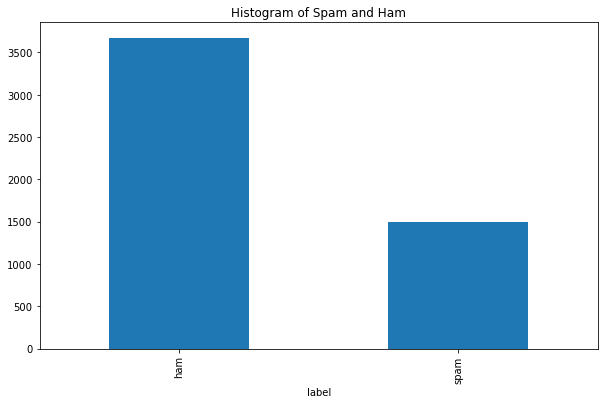

In [12]:

data_frame['label'].value_counts().plot(kind='bar',figsize=(10,6),title="Histogram of Spam and Ham",xlabel="label")

In [13]:
# Printing examples of ham messages
print("Some examples of ham messages:")
print(data_frame[data_frame['label'] == 'ham']['text'].head())

Some examples of ham messages:
0    Subject: enron methanol ; meter # : 988291\r\n...
1    Subject: hpl nom for january 9 , 2001\r\n( see...
2    Subject: neon retreat\r\nho ho ho , we ' re ar...
4    Subject: re : indian springs\r\nthis deal is t...
5    Subject: ehronline web address change\r\nthis ...
Name: text, dtype: object


In [14]:
# Printing examples of spam messages
print(" Some examples of spam messages:")
print(data_frame[data_frame['label'] == 'spam']['text'].head())

 Some examples of spam messages:
3     Subject: photoshop , windows , office . cheap ...
7     Subject: looking for medication ? we ` re the ...
10    Subject: vocable % rnd - word asceticism\r\nvc...
11    Subject: report 01405 !\r\nwffur attion brom e...
13    Subject: vic . odin n ^ ow\r\nberne hotbox car...
Name: text, dtype: object


#### Building the Model

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
#First step in building the model is to identify the Feature(Input) variables and Target (Output) variable
#Features are the emails
#Target represents the labels for spam and ham emails
features = data_frame['text']
target = data_frame['label_num']

#####  * Splitting data for training and testing the model

In [17]:
# Splitting data for training the model and testing the model
# train size taken as 0.8
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = .8)
# Dimensions of Train and Test Data sets
print('Train set of features: ', X_train.shape)
print('Test set of features: ', X_test.shape)
print('Target for train: ', y_train.shape)
print('Target for test: ', y_test.shape)

Train set of features:  (4136,)
Test set of features:  (1035,)
Target for train:  (4136,)
Target for test:  (1035,)


### Learn the model on train data

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
#CountVectorizer transform text into a vector on the basis of the frequency/count of each word that occurs in entire text.
#Covert each word in Train dataset into vectors for using them in further text analysis.
cv=CountVectorizer()
X_train_vector=cv.fit_transform(X_train.values)
X_train_vector.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [5, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [20]:
# Here Multinomial Naive Bayes model which is a supervised learning classification 
#Used for the analysis of the categorical text data. 
from sklearn.naive_bayes import MultinomialNB
my_model=MultinomialNB()

In [21]:
# Fitting the model in train data set ie the MultinomialNB Model should learn from the Train Data
my_model.fit(X_train_vector, y_train)

MultinomialNB()

In [22]:
#Coverting each word in Test dataset into vectors for using them in further text analysis.
X_test_vector=cv.transform(X_test.values)
X_test_vector.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#### Prediction

In [23]:
# Predicting whether the mails in Test Dataset are spam or non-spam using our model from Feature Test values
y_pred = my_model.predict(X_test_vector)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

#### Testing the model

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [25]:
# find Accurancy Score = (TP+TN)/(TP+TN+FP+FN)
accuracy_score(y_test, y_pred)

0.9768115942028985

In [26]:
# find Precision Score= TP/(TP+FP)
precision_score(y_test, y_pred)

0.9615384615384616

In [27]:
# Recall = TP/(TP+FN)
# Recall gives the percentage of positives well predicted by our model.
recall_score(y_test, y_pred)

0.9548611111111112

In [28]:
# f1_score= (Precition * Recall )/ (Precition + Recall)
f1_score(y_test, y_pred)

0.9581881533101045

Thank You